# Question 1

The posterior predictive distribution is created using these steps:

- Randomly choose a chain and a draw
- Get the vector of $\mu$'s, $\sigma$'s and weights from the corresponding chain and draw
- Evaluate the pdf of a normal distribution for each pair of $\mu$ and $\sigma$ over the support
- Weight each pdf with the weights vector and sum over the pdfs to get one single posterior predictive distribution
- Repeat from first step many times
- Average over all these pdfs to get the posterior predictive distribution mean
    

# Question 2

To get posterior predictive distribution in general:

- Sample parameter values from the posterior distribution using the trace
- For each set of parameter values, generate new data from the likelihood function $p(y_{new}|\theta)$
- Collect these generated data points across all sampled parameter sets. 

The resulting collection of generated data points forms the posterior predictive dsitribution.

# Question 3

We can impute these missing values as part of the model fitting process. This involves treating the missing values as additional unknown parameters in the model and assigning them prior distributions. During the sampling, the model not only estimates the other model parameters but also the most probable values for the missing data given the observed data and the model structure. This allows for the integration of uncertainty about the missing data into the inference process, ensuring that the analysis utilizes all available information without biasing the results by omitting incomplete data.

In [23]:
import numpy as np
import pymc as pm


fake_data = np.random.normal(2, 5, size=100)
fake_data2 = np.random.normal(-1, 5, size=100)
y = 3*fake_data + 2*fake_data2 + np.random.normal(0, 1, size=100)
fake_data[:3] = np.nan  # Introducing NaNs

masked_fake_data = np.ma.masked_array(fake_data, np.isnan(fake_data))

with pm.Model() as model:

    imputed_fake_data = pm.Normal("imputed_fake_data", mu=2, sigma=5, observed=masked_fake_data)

    X_complete = pm.math.stack([imputed_fake_data, fake_data2], axis=1)
    
    b = pm.Normal('b', 0, 10, shape=2)
    sigma = pm.HalfNormal('sigma', 20)
    mu = pm.math.dot(X_complete, b)
    y_obs = pm.Normal('y_obs', mu, sigma, observed=y)
    
    trace = pm.sample(500)


c:\Users\Matth\anaconda3\lib\site-packages\pymc\model\core.py:1323: ImputationWarning: Data in imputed_fake_data contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [imputed_fake_data_unobserved, b, sigma]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 21 seconds.


c:\Users\Matth\anaconda3\lib\site-packages\arviz\stats\density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
imputed_fake_data_unobserved[0],6.523,0.360,5.888,7.228,0.007,0.005,2516.0,1453.0,1.0
imputed_fake_data_unobserved[1],2.403,0.364,1.719,3.100,0.006,0.005,3180.0,1311.0,1.0
imputed_fake_data_unobserved[2],4.571,0.362,3.922,5.270,0.007,0.005,2826.0,1480.0,1.0


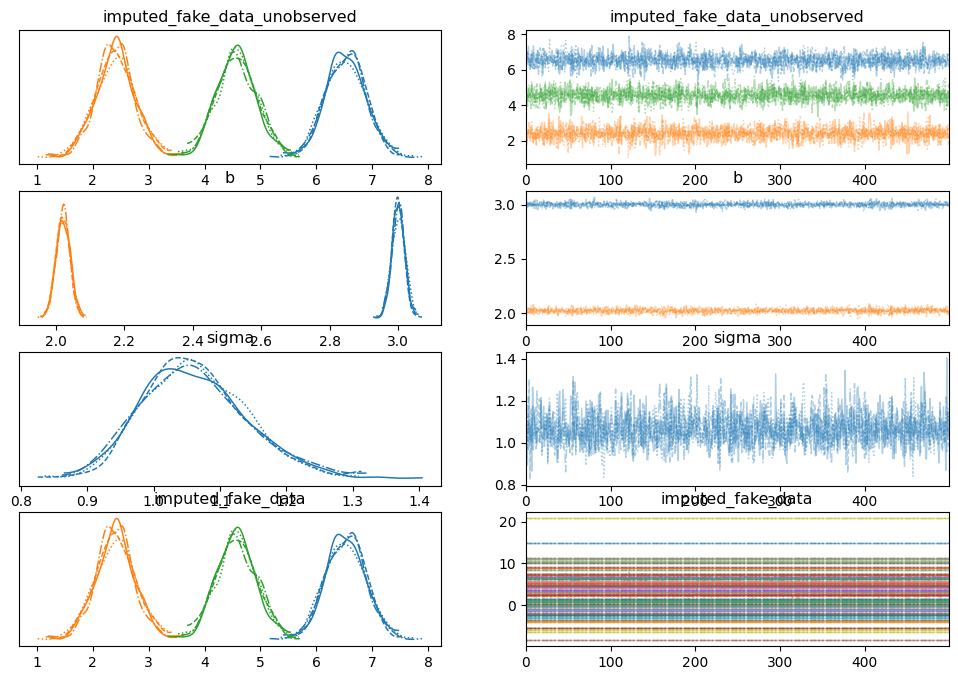

In [24]:
import arviz as az
az.plot_trace(trace)
az.summary(trace, var_names=["imputed_fake_data_unobserved"])